## Machine Learning Assessment - Dure Sabih (Student ID 0070990)
## Task 2 Association

## DATA PRE-PROCESSING 

In [4]:
#importing Libraries
!pip install mlxtend
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
# For Association rules Analysis
from apyori import apriori
import plotly.express as px
import utils
%matplotlib inline

In [5]:
data=pd.read_table('DigitalBreathTestData2013.txt')

In [6]:
df=data['Reason,Month,Year,WeekType,TimeBand,BreathAlcoholLevel(microg 100ml),AgeBand,Gender'].str.split(',', expand=True)

In [7]:
df.drop(data.tail(450000).index,
        inplace = True)

In [8]:
df = df.rename(columns= {0:'Reason',1:'Month', 2:'Year', 3:'WeekType',4:'Time', 5:'Intoxication', 6
                   :'AgeBand', 7:'Gender'})

In [9]:
df

,Reason,Month,Year,WeekType,Time,Intoxication,AgeBand,Gender
0,Moving Traffic Violation,Jan,2013,Weekday,12am-4am,80,30-39,Male
1,Road Traffic Collision,Jan,2013,Weekday,12am-4am,0,Other,Male
2,Road Traffic Collision,Jan,2013,Weekday,12am-4am,96,Other,Male
3,Moving Traffic Violation,Jan,2013,Weekday,12am-4am,0,40-49,Female
4,Suspicion of Alcohol,Jan,2013,Weekday,12am-4am,0,40-49,Male
...,...,...,...,...,...,...,...,...
47785,Other,Dec,2013,Weekday,8pm-12pm,0,40-49,Male
47786,Other,Dec,2013,Weekday,8pm-12pm,0,50-59,Female
47787,Moving Traffic Violation,Dec,2013,Weekday,8am-12pm,4,20-24,Male
47788,Road Traffic Collision,Dec,2013,Weekday,8am-12pm,0,50-59,Female


In [10]:
df= df.drop((['Year']), axis=1)

In [11]:
df= df.drop((['AgeBand']), axis=1)

In [12]:
df.head()

,Reason,Month,WeekType,Time,Intoxication,Gender
0,Moving Traffic Violation,Jan,Weekday,12am-4am,80,Male
1,Road Traffic Collision,Jan,Weekday,12am-4am,0,Male
2,Road Traffic Collision,Jan,Weekday,12am-4am,96,Male
3,Moving Traffic Violation,Jan,Weekday,12am-4am,0,Female
4,Suspicion of Alcohol,Jan,Weekday,12am-4am,0,Male


## Checking types of Features

In [13]:
df.dtypes

Reason          object
Month           object
WeekType        object
Time            object
Intoxication    object
Gender          object
dtype: object

## Changing intoxication to categorical

In [14]:
df['Intoxication']= df['Intoxication'].astype(str).astype(int)

In [15]:
df['Intoxication'].values[df['Intoxication'].values < 34] = 0

In [16]:
df['Intoxication'].values[df['Intoxication'].values > 33] = 1

In [17]:
df.Intoxication.replace((1,0), ('Intoxicated', 'Not Intoxicated'), inplace=True)


## Null values check

In [18]:
df.isnull().sum()  # 0 null values

Reason          0
Month           0
WeekType        0
Time            0
Intoxication    0
Gender          0
dtype: int64

In [19]:
df.dtypes # types of values

Reason          object
Month           object
WeekType        object
Time            object
Intoxication    object
Gender          object
dtype: object

In [20]:
df.Intoxication.unique()  

array(['Intoxicated', 'Not Intoxicated'], dtype=object)

In [21]:
df.Reason.unique()

array(['Moving Traffic Violation', 'Road Traffic Collision',
       'Suspicion of Alcohol', 'Other', 'Unknown'], dtype=object)

In [22]:
df.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [23]:
df = df[df["Time"].str.contains("Unknown") == False]

In [24]:
df = df[df["Reason"].str.contains("Unknown") == False]

In [25]:
df = df[df["Reason"].str.contains("Other") == False]

In [26]:
df = df[df["Month"].str.contains("Unknown") == False]

In [27]:
df = df[df["WeekType"].str.contains("Unknown") == False]

In [28]:
df = df[df["Intoxication"].str.contains("Unknown") == False]

In [29]:

df = df[df["Gender"].str.contains("Unknown") == False]

In [30]:
df.Reason.unique()

array(['Moving Traffic Violation', 'Road Traffic Collision',
       'Suspicion of Alcohol'], dtype=object)

In [31]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [32]:
df.Time.unique()

array(['12am-4am', '8am-12pm', '8pm-12pm', '4am-8am', '4pm-8pm',
       '12pm-4pm'], dtype=object)

In [33]:
df.shape

(43259, 6)

In [34]:
#The Categorical Features are those features in which datatype is an Object type. 
#The value of data point in any categorical feature is not in numerical form, rather it was in object form.
#https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/

In [35]:
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

In [36]:
enc= preprocessing.OneHotEncoder()
feature_array = enc.fit_transform(df[["Reason","Month","WeekType","Time","Intoxication","Gender"]]).toarray()

In [37]:
enc.categories_

[array(['Moving Traffic Violation', 'Road Traffic Collision',
        'Suspicion of Alcohol'], dtype=object),
 array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
        'Nov', 'Oct', 'Sep'], dtype=object),
 array(['Weekday', 'Weekend'], dtype=object),
 array(['12am-4am', '12pm-4pm', '4am-8am', '4pm-8pm', '8am-12pm',
        '8pm-12pm'], dtype=object),
 array(['Intoxicated', 'Not Intoxicated'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [38]:
new_labels = np.concatenate(enc.categories_) 
#combining different array of arrays - tuples or lists of arrays

In [39]:
new_labels

array(['Moving Traffic Violation', 'Road Traffic Collision',
       'Suspicion of Alcohol', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Weekday', 'Weekend',
       '12am-4am', '12pm-4pm', '4am-8am', '4pm-8pm', '8am-12pm',
       '8pm-12pm', 'Intoxicated', 'Not Intoxicated', 'Female', 'Male'],
      dtype=object)

In [40]:
new_labels=np.array(new_labels, dtype=object).ravel()

In [41]:
print(new_labels)

['Moving Traffic Violation' 'Road Traffic Collision'
 'Suspicion of Alcohol' 'Apr' 'Aug' 'Dec' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar'
 'May' 'Nov' 'Oct' 'Sep' 'Weekday' 'Weekend' '12am-4am' '12pm-4pm'
 '4am-8am' '4pm-8pm' '8am-12pm' '8pm-12pm' 'Intoxicated' 'Not Intoxicated'
 'Female' 'Male']


#Creating a new Table for use on Apriori Algo

## PERFORMING EDA on our NEW TABLE

In [42]:
table =pd.DataFrame(feature_array , columns=new_labels)

In [43]:
table.replace((1,0), ('Yes', 'No'), inplace=True)

In [44]:
table

,Moving Traffic Violation,Road Traffic Collision,Suspicion of Alcohol,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,12am-4am,12pm-4pm,4am-8am,4pm-8pm,8am-12pm,8pm-12pm,Intoxicated,Not Intoxicated,Female,Male
0,Yes,No,No,No,No,No,No,Yes,No,No,...,Yes,No,No,No,No,No,Yes,No,No,Yes
1,No,Yes,No,No,No,No,No,Yes,No,No,...,Yes,No,No,No,No,No,No,Yes,No,Yes
2,No,Yes,No,No,No,No,No,Yes,No,No,...,Yes,No,No,No,No,No,Yes,No,No,Yes
3,Yes,No,No,No,No,No,No,Yes,No,No,...,Yes,No,No,No,No,No,No,Yes,Yes,No
4,No,No,Yes,No,No,No,No,Yes,No,No,...,Yes,No,No,No,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43254,Yes,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,Yes,No,Yes,Yes,No
43255,Yes,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,Yes,No,Yes,No,Yes
43256,Yes,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,Yes,No,No,Yes,No,Yes
43257,No,Yes,No,No,No,Yes,No,No,No,No,...,No,No,No,No,Yes,No,No,Yes,Yes,No


In [45]:
table.tail()

,Moving Traffic Violation,Road Traffic Collision,Suspicion of Alcohol,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,12am-4am,12pm-4pm,4am-8am,4pm-8pm,8am-12pm,8pm-12pm,Intoxicated,Not Intoxicated,Female,Male
43254,Yes,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,Yes,No,Yes,Yes,No
43255,Yes,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,Yes,No,Yes,No,Yes
43256,Yes,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,Yes,No,No,Yes,No,Yes
43257,No,Yes,No,No,No,Yes,No,No,No,No,...,No,No,No,No,Yes,No,No,Yes,Yes,No
43258,No,Yes,No,No,No,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,Yes,No,Yes


In [46]:
table.describe()

,Moving Traffic Violation,Road Traffic Collision,Suspicion of Alcohol,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,12am-4am,12pm-4pm,4am-8am,4pm-8pm,8am-12pm,8pm-12pm,Intoxicated,Not Intoxicated,Female,Male
count,43259,43259,43259,43259,43259,43259,43259,43259,43259,43259,...,43259,43259,43259,43259,43259,43259,43259,43259,43259,43259
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Yes,No,Yes
freq,25635,26988,33895,41031,40086,36007,40125,40161,40309,35667,...,34484,37336,39727,35637,36557,32554,38328,38328,34430,34430


In [47]:
table.dtypes

Moving Traffic Violation    object
Road Traffic Collision      object
Suspicion of Alcohol        object
Apr                         object
Aug                         object
Dec                         object
Feb                         object
Jan                         object
Jul                         object
Jun                         object
Mar                         object
May                         object
Nov                         object
Oct                         object
Sep                         object
Weekday                     object
Weekend                     object
12am-4am                    object
12pm-4pm                    object
4am-8am                     object
4pm-8pm                     object
8am-12pm                    object
8pm-12pm                    object
Intoxicated                 object
Not Intoxicated             object
Female                      object
Male                        object
dtype: object

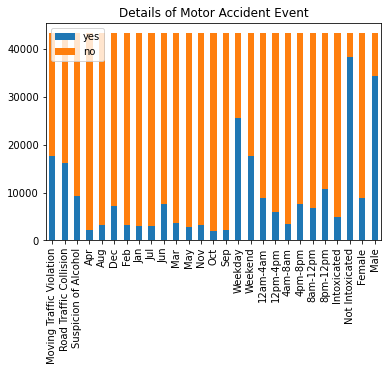

In [48]:
#plot and explore the data set 
yes= (table == 'Yes').sum()
no = (table == "No").sum()
event = pd.concat([yes,no],axis=1, keys = ["yes","no"])
ax = event.plot.bar(stacked = True)
plt.title('Details of Motor Accident Event')
plt.show()

Using UTILS to create list of list from our Table

In [49]:
utils.extract

<function utils.extract(rules, filter='All', min_element=1)>

In [50]:
event = utils.data_prepare(table)

In [101]:
#Generating association rules
Rules = list(apriori(event, min_support = 0.2, min_confidence = 0.2))

In [102]:
# Extract the created rules
associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules,columns = ['LHS','RHS','Support','Confidence','Lift'])
len(rules_df)

91

## Exploring all dataset

In [115]:
rules_df.nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
1,[],[Not Intoxicated],0.886012,0.886012,1.000000
0,[],[Male],0.795904,0.795904,1.000000
26,[],"[Not Intoxicated, Male]",0.699485,0.699485,1.000000
27,[Male],[Not Intoxicated],0.699485,0.878856,0.991923
28,[Not Intoxicated],[Male],0.699485,0.789475,0.991923
2,[],[Weekday],0.591831,0.591831,1.000000
39,[],"[Not Intoxicated, Weekday]",0.533831,0.533831,1.000000
40,[Not Intoxicated],[Weekday],0.533831,0.602510,1.018045
41,[Weekday],[Not Intoxicated],0.533831,0.902000,1.018045
31,[],"[Weekday, Male]",0.466400,0.466400,1.000000


In [104]:
#Looking at top 10 rules with highest lift 
rules_df.nlargest(10, "Lift")

,LHS,RHS,Support,Confidence,Lift
88,"[Not Intoxicated, Road Traffic Collision]",[Weekday],0.229316,0.687123,1.161014
87,[Weekday],"[Not Intoxicated, Road Traffic Collision]",0.229316,0.387470,1.161014
86,[Road Traffic Collision],"[Not Intoxicated, Weekday]",0.229316,0.609674,1.142072
89,"[Not Intoxicated, Weekday]",[Road Traffic Collision],0.229316,0.429567,1.142072
47,[Road Traffic Collision],[Weekday],0.251138,0.667691,1.128179
48,[Weekday],[Road Traffic Collision],0.251138,0.424342,1.128179
51,[Moving Traffic Violation],"[Not Intoxicated, Male]",0.302897,0.743475,1.062890
54,"[Not Intoxicated, Male]",[Moving Traffic Violation],0.302897,0.433028,1.062890
79,[Not Intoxicated],"[Moving Traffic Violation, Weekday]",0.212025,0.239303,1.058271
82,"[Moving Traffic Violation, Weekday]",[Not Intoxicated],0.212025,0.937641,1.058271


In [55]:
rules_df.nlargest(10, "Confidence")

,LHS,RHS,Support,Confidence,Lift
82,"[Moving Traffic Violation, Weekday]",[Not Intoxicated],0.212025,0.937641,1.058271
32,[Moving Traffic Violation],[Not Intoxicated],0.378233,0.928393,1.047833
53,"[Moving Traffic Violation, Male]",[Not Intoxicated],0.302897,0.924700,1.043665
90,"[Weekday, Road Traffic Collision]",[Not Intoxicated],0.229316,0.913108,1.030581
42,[Weekday],[Not Intoxicated],0.533831,0.902000,1.018045
68,"[Weekday, Male]",[Not Intoxicated],0.417277,0.894677,1.009779
14,[8pm-12pm],[Not Intoxicated],0.221179,0.893788,1.008776
39,[Road Traffic Collision],[Not Intoxicated],0.333734,0.887284,1.001436
5,[],[Not Intoxicated],0.886012,0.886012,1.000000
20,[Male],[Not Intoxicated],0.699485,0.878856,0.991923


We can see that the top rules that have most support are those with an empty 
itemset on the LHS. However, these aren’t particularly useful as rules as they 
don’t provide any association. We can use a lambda function to filter out those 
rules which have an empty list in the LHS column of the Data FrameRemoving columns with empty LHS in max support 
#use lambda ftn

In [56]:
rules_df[rules_df['LHS'].apply(lambda x: len(x) > 0)].nlargest(10, "Support")

,LHS,RHS,Support,Confidence,Lift
20,[Male],[Not Intoxicated],0.699485,0.878856,0.991923
21,[Not Intoxicated],[Male],0.699485,0.789475,0.991923
41,[Not Intoxicated],[Weekday],0.533831,0.602510,1.018045
42,[Weekday],[Not Intoxicated],0.533831,0.902000,1.018045
26,[Male],[Weekday],0.466400,0.586001,0.990149
27,[Weekday],[Male],0.466400,0.788063,0.990149
64,[Male],"[Not Intoxicated, Weekday]",0.417277,0.524281,0.982111
65,[Not Intoxicated],"[Weekday, Male]",0.417277,0.470961,1.009779
66,[Weekday],"[Not Intoxicated, Male]",0.417277,0.705062,1.007974
67,"[Not Intoxicated, Male]",[Weekday],0.417277,0.596550,1.007974


In [108]:
#decreasin the number of itemset - itemset of 3
#create association rules on the main dataset
Rules = list(apriori(event, min_support = 0.1, min_confidence = 0.4, max_length = 3))
associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules,columns = ['LHS','RHS','Support','Confidence','Lift'])
len(rules_df)

137

In [109]:
rules_df.nlargest(10,'Lift')

,LHS,RHS,Support,Confidence,Lift
90,[Jun],"[Not Intoxicated, Weekend]",0.110081,0.627239,1.781013
26,[Jun],[Weekend],0.122841,0.699947,1.714845
91,"[Not Intoxicated, Jun]",[Weekend],0.110081,0.688250,1.686187
81,[Dec],"[Not Intoxicated, Moving Traffic Violation]",0.102938,0.614038,1.623435
83,"[Not Intoxicated, Dec]",[Moving Traffic Violation],0.102938,0.649125,1.593311
20,[Dec],[Moving Traffic Violation],0.105019,0.626448,1.537648
74,"[Not Intoxicated, 8pm-12pm]",[Moving Traffic Violation],0.114774,0.518917,1.273709
7,[12am-4am],[Weekend],0.104025,0.512821,1.256391
72,[8pm-12pm],"[Not Intoxicated, Moving Traffic Violation]",0.114774,0.463802,1.226232
16,[8pm-12pm],[Moving Traffic Violation],0.121963,0.492854,1.209735


In [59]:
rules_df.nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
1,[],[Not Intoxicated],0.886012,0.886012,1.000000
0,[],[Male],0.795904,0.795904,1.000000
3,[],"[Not Intoxicated, Male]",0.699485,0.699485,1.000000
4,[Male],[Not Intoxicated],0.699485,0.878856,0.991923
5,[Not Intoxicated],[Male],0.699485,0.789475,0.991923
2,[],[Weekday],0.591831,0.591831,1.000000
6,[],"[Not Intoxicated, Weekday]",0.533831,0.533831,1.000000
7,[Not Intoxicated],[Weekday],0.533831,0.602510,1.018045
8,[Weekday],[Not Intoxicated],0.533831,0.902000,1.018045


In [60]:
rules_df.nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
8,[Weekday],[Not Intoxicated],0.533831,0.902000,1.018045
1,[],[Not Intoxicated],0.886012,0.886012,1.000000
4,[Male],[Not Intoxicated],0.699485,0.878856,0.991923
0,[],[Male],0.795904,0.795904,1.000000
5,[Not Intoxicated],[Male],0.699485,0.789475,0.991923
3,[],"[Not Intoxicated, Male]",0.699485,0.699485,1.000000
7,[Not Intoxicated],[Weekday],0.533831,0.602510,1.018045
2,[],[Weekday],0.591831,0.591831,1.000000
6,[],"[Not Intoxicated, Weekday]",0.533831,0.533831,1.000000


## Creating Motor Traffic Violations df to explore

In [129]:
Rules = list(apriori(event, min_support = 0.1, min_confidence = 0.45,max_length=3))
associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
mt= rules_df[rules_df['RHS'].apply(lambda x: 'Moving Traffic Violation' in x)].sort_values(by=['Lift'],ascending=False)

In [130]:
mt.nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
113,"[Not Intoxicated, Weekend]",[Moving Traffic Violation],0.166208,0.471940,1.158400
14,[8pm-12pm],[Moving Traffic Violation],0.121963,0.492854,1.209735
66,"[Not Intoxicated, 8pm-12pm]",[Moving Traffic Violation],0.114774,0.518917,1.273709
64,[8pm-12pm],"[Not Intoxicated, Moving Traffic Violation]",0.114774,0.463802,1.226232
18,[Dec],[Moving Traffic Violation],0.105019,0.626448,1.537648
73,[Dec],"[Not Intoxicated, Moving Traffic Violation]",0.102938,0.614038,1.623435
75,"[Not Intoxicated, Dec]",[Moving Traffic Violation],0.102938,0.649125,1.593311


In [116]:
mt.nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
75,"[Not Intoxicated, Dec]",[Moving Traffic Violation],0.102938,0.649125,1.593311
18,[Dec],[Moving Traffic Violation],0.105019,0.626448,1.537648
73,[Dec],"[Not Intoxicated, Moving Traffic Violation]",0.102938,0.614038,1.623435
66,"[Not Intoxicated, 8pm-12pm]",[Moving Traffic Violation],0.114774,0.518917,1.273709
14,[8pm-12pm],[Moving Traffic Violation],0.121963,0.492854,1.209735
113,"[Not Intoxicated, Weekend]",[Moving Traffic Violation],0.166208,0.471940,1.158400
64,[8pm-12pm],"[Not Intoxicated, Moving Traffic Violation]",0.114774,0.463802,1.226232


Rules = list(apriori(event, min_support = 0.1, min_confidence = 0.45))
associationRules = utils.extract(Rules,'Moving Traffic Violation',2)
utils.inspect(associationRules)

In [117]:
mt.nlargest(10,'Lift')

,LHS,RHS,Support,Confidence,Lift
73,[Dec],"[Not Intoxicated, Moving Traffic Violation]",0.102938,0.614038,1.623435
75,"[Not Intoxicated, Dec]",[Moving Traffic Violation],0.102938,0.649125,1.593311
18,[Dec],[Moving Traffic Violation],0.105019,0.626448,1.537648
66,"[Not Intoxicated, 8pm-12pm]",[Moving Traffic Violation],0.114774,0.518917,1.273709
64,[8pm-12pm],"[Not Intoxicated, Moving Traffic Violation]",0.114774,0.463802,1.226232
14,[8pm-12pm],[Moving Traffic Violation],0.121963,0.492854,1.209735
113,"[Not Intoxicated, Weekend]",[Moving Traffic Violation],0.166208,0.471940,1.158400


!pip install plotly==5.10.0

In [63]:
import plotly.express as px

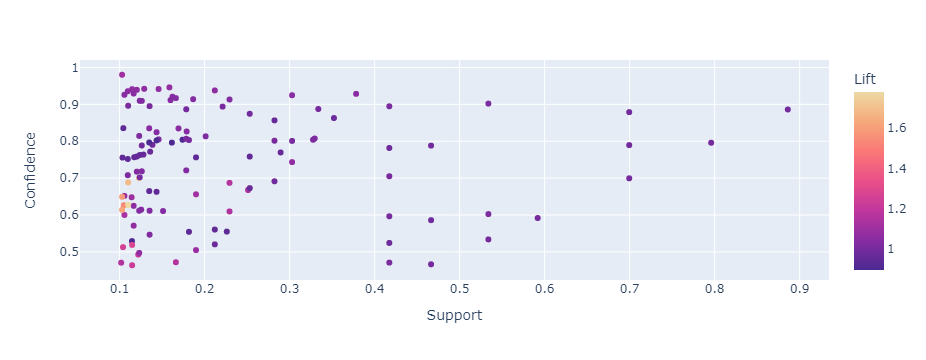

In [119]:
fig = px.scatter(rules_df, x="Support", y="Confidence", color="Lift", 
                 hover_data =["LHS","RHS"], color_continuous_scale="agsunset")
fig.show()

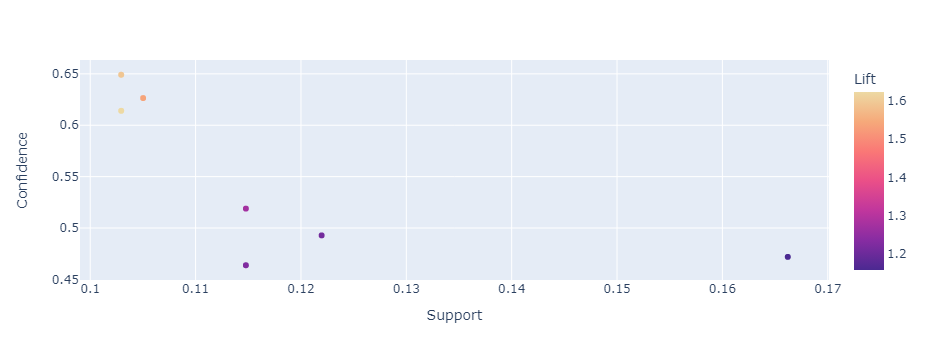

In [120]:
fig = px.scatter(mt, x="Support", y="Confidence", color="Lift", 
                 hover_data =["LHS","RHS"], color_continuous_scale="agsunset")
fig.show()

## Plots for Checking type of accidents

Text(0.5, 1.0, '')

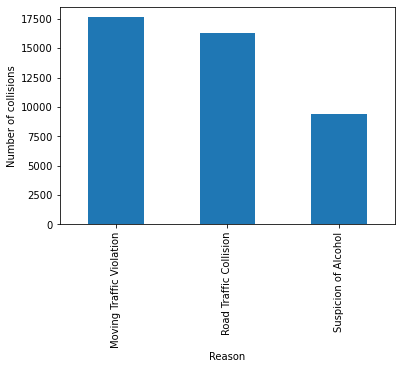

In [121]:
fig, ax=plt.subplots(figsize=(6,4))
df['Reason'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of collisions')
plt.xlabel('Reason')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('')

Text(0.5, 1.0, 'Gender based ')

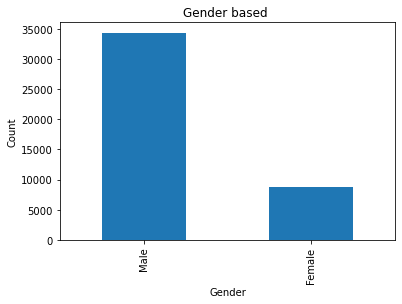

In [66]:
fig, ax=plt.subplots(figsize=(6,4))
df['Gender'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Gender')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Gender based ')

Text(0.5, 1.0, 'Week or Weekend')

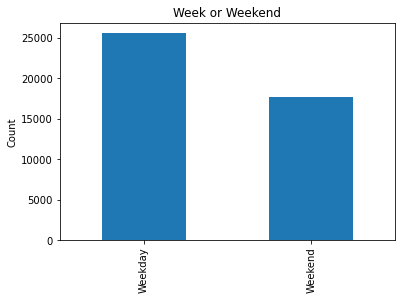

In [67]:
fig, ax=plt.subplots(figsize=(6,4))
df['WeekType'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Week or Weekend')

Text(0.5, 1.0, 'Week or Weekend')

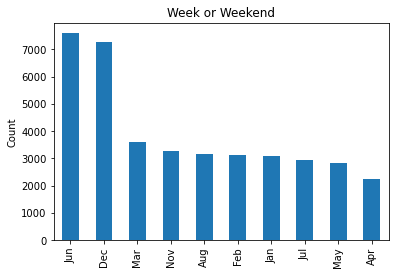

In [68]:
fig, ax=plt.subplots(figsize=(6,4))
df['Month'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Week or Weekend')